In [1]:
# to avoid the warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
# importing the libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# reading the dataset
df = pd.read_csv('/content/advertising_ef.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,68.95,35.0,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,Female,Tunisia,27-03-2016 00:53,0
1,NaN,31.0,68441.85,193.77,Monitored national standardization,West Jodi,Male,Nauru,04-04-2016 01:39,0
2,69.47,26.0,59785.94,236.50,Organic bottom-line service-desk,Davidton,Female,San Marino,13-03-2016 20:35,0
3,74.15,29.0,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,Male,Italy,10-01-2016 02:31,0
4,68.37,35.0,73889.99,225.58,Robust logistical utilization,South Manuel,Female,Iceland,03-06-2016 03:36,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1005 non-null   float64
 1   Age                       998 non-null    float64
 2   Area Income               998 non-null    float64
 3   Daily Internet Usage      1005 non-null   float64
 4   Ad Topic Line             1009 non-null   object 
 5   City                      998 non-null    object 
 6   Gender                    1009 non-null   object 
 7   Country                   996 non-null    object 
 8   Timestamp                 1009 non-null   object 
 9   Clicked on Ad             1009 non-null   int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 79.0+ KB


In [7]:
#checking if we have a balanced dataset
df['Clicked on Ad'].value_counts()

,count
Clicked on Ad,
1,506
0,503


In [8]:
## Checking for Missing Values
missing_values = df.isna().sum()
print("Number of missing values per column:", missing_values)

Number of missing values per column: Daily Time Spent on Site     4
Age                         11
Area Income                 11
Daily Internet Usage         4
Ad Topic Line                0
City                        11
Gender                       0
Country                     13
Timestamp                    0
Clicked on Ad                0
dtype: int64


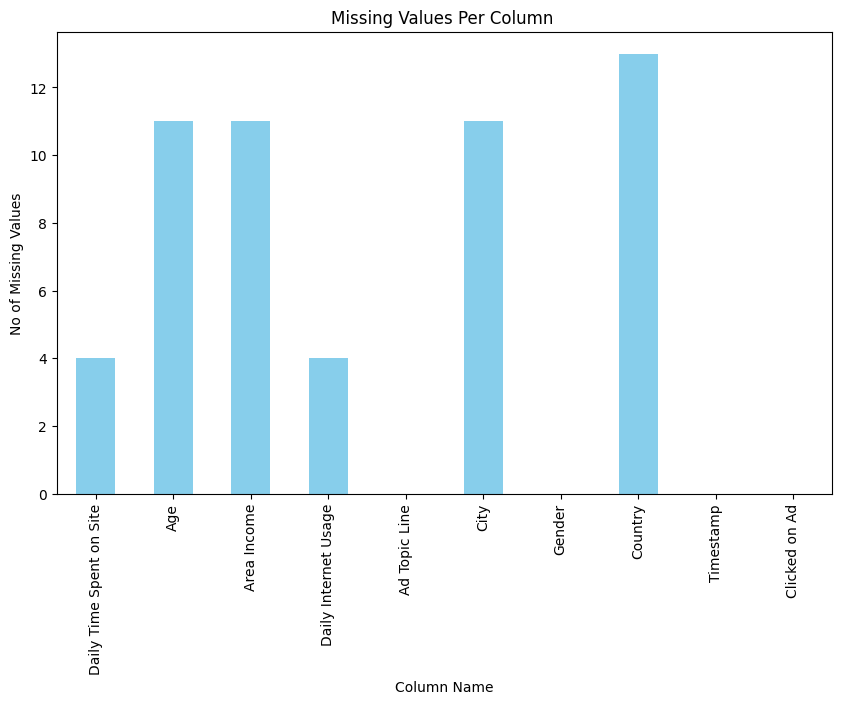

In [9]:
# Plotting the missing values as a bar chart
plt.figure(figsize=(10, 6))
missing_values.plot(kind='bar', color='skyblue')
plt.title('Missing Values Per Column ')
plt.xlabel('Column Name')
plt.ylabel('No of Missing Values')
plt.xticks(rotation=90)
plt.show()

**Handling the missing Data**

Since this dataset has a limited amount of data, removing rows would lead to data loss and could negatively impact the overall results. Therefore, for numerical columns, imputing missing values with the mean ensures we retain all rows while preserving the overall data distribution.

For categorical columns, filling missing values with 'Unknown' allows us to retain information about rows with missing location data (e.g., 'City' or 'Country'), which could be valuable for analysis or modeling.

In [10]:
# Filling in  missing values with mean for the integer columns
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean(), inplace = True)
df['Area Income'].fillna(df['Area Income'].mean(), inplace = True)
df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean(), inplace= True)


#Filling in missing values in City and Country with 'Unknown'
df['Country'].fillna('Unknown', inplace= True)
df['City'].fillna('Unknown', inplace= True)

In [11]:
# checking missing values again after filling
df.isna().sum()

,0
Daily Time Spent on Site,0
Age,0
Area Income,0
Daily Internet Usage,0
Ad Topic Line,0
City,0
Gender,0
Country,0
Timestamp,0
Clicked on Ad,0


In [31]:
#Cleaning the data:
# Converting 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Extracting additional features from 'Timestamp'
df['Hour'] = df['Timestamp'].dt.hour
df['Day'] = df['Timestamp'].dt.day
df['month'] = df['Timestamp'].dt.month

**Exploratory Data Visualization**

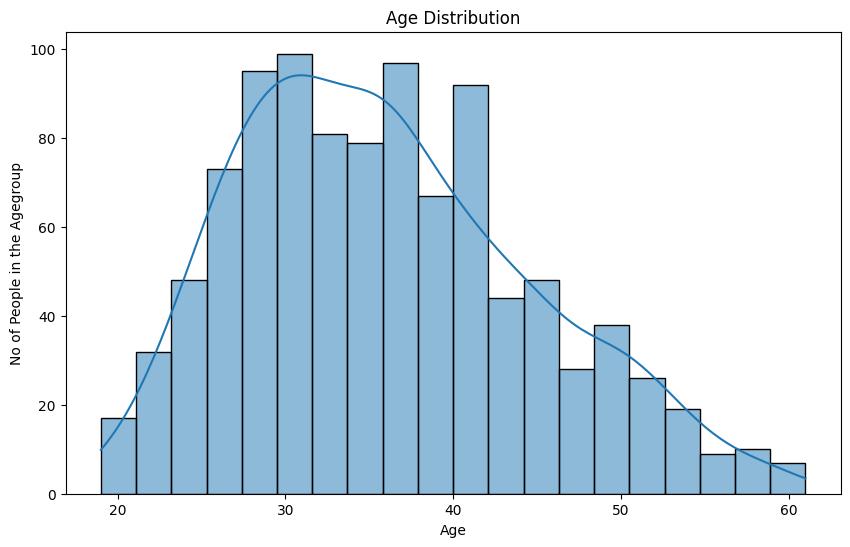

In [12]:
# Age Distribution Histogram
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins =20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('No of People in the Agegroup')
plt.show()


The distribution is right-skewed, suggesting a smaller proportion of older individuals above 40 in the dataset.

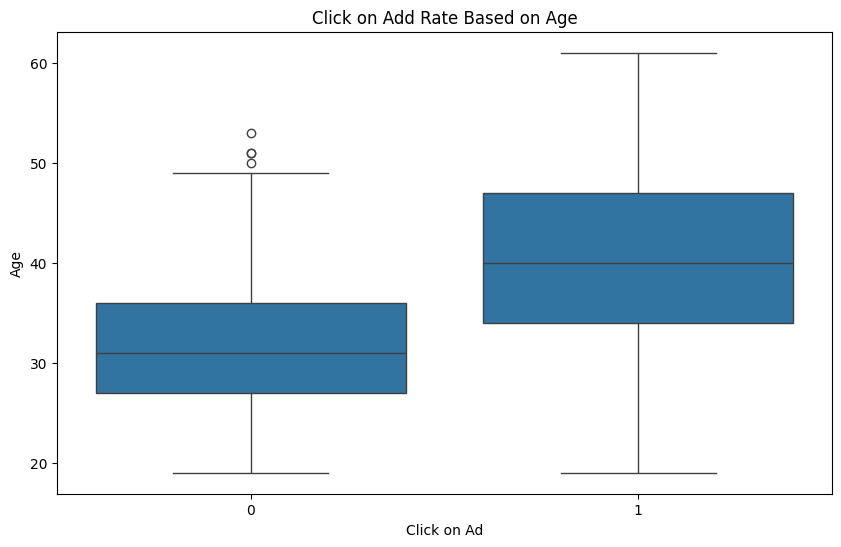

In [13]:
# Age vs. Clicked on Ad
plt.figure(figsize=(10,6))
sns.boxplot(x= df['Clicked on Ad'], y= df['Age'])
plt.title('Click on Add Rate Based on Age')
plt.xlabel('Click on Ad')
plt.ylabel('Age')
plt.show()

age appears to be a significant factor in ad engagement, Older individuals 40s and above are more likely to engage with the ad, as shown by their higher representation in the "clicked" group. Younger individuals 30s and below are less likely to engage, with their ages being more prevalent in the "did not click" group.

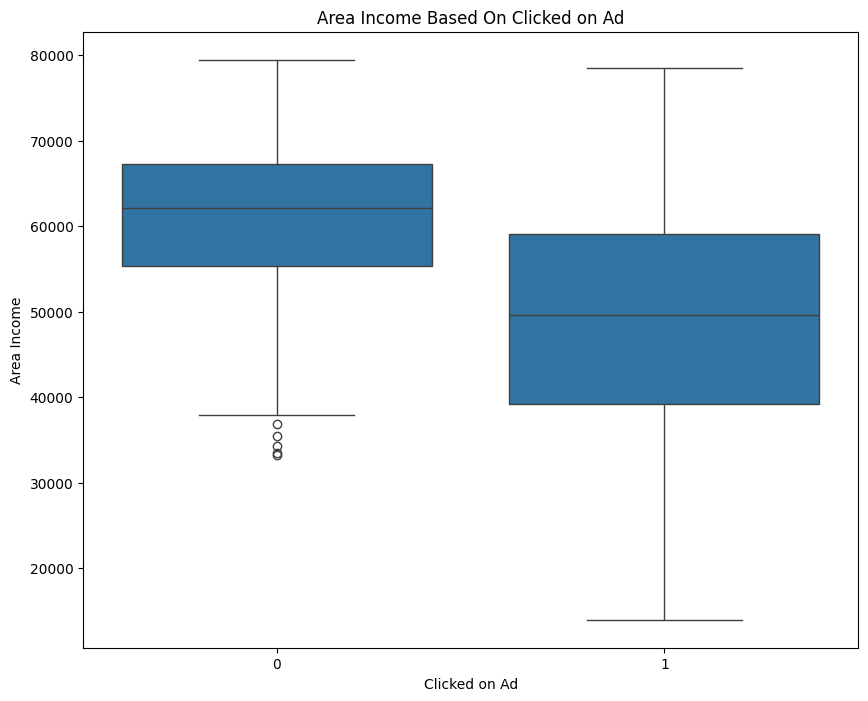

In [14]:
# Area Income vs. Clicked on Ad

plt.figure(figsize=(10, 8))
sns.boxplot(x= df['Clicked on Ad'], y= df['Area Income'])
plt.title("Area Income Based On Clicked on Ad")
plt.xlabel("Clicked on Ad")
plt.ylabel("Area Income")
plt.show()

Individuals with higher area incomes are less likely to engage with ads.


<Axes: xlabel='Clicked on Ad', ylabel='Age'>

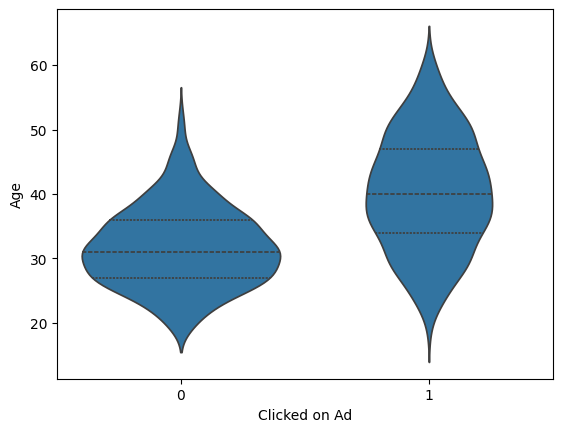

In [15]:
# Violin Plot for Age and Clicked on Ad

sns.violinplot(x= df['Clicked on Ad'], y=df['Age'], inner='quart')

<Axes: xlabel='Clicked on Ad', ylabel='Daily Time Spent on Site'>

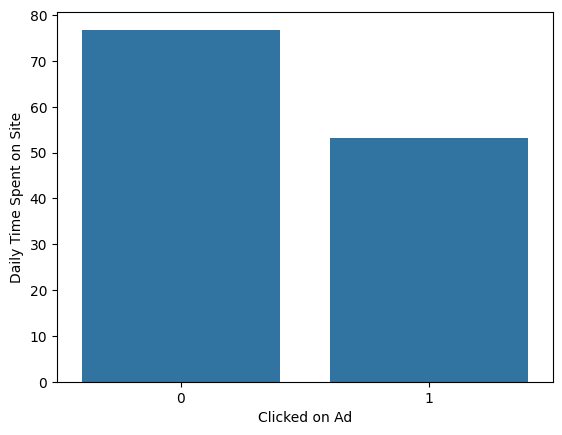

In [16]:
# Average Daily Time Spent on Site by Clicked on Ad
# This chart will show the average daily time spent on the site by whether an ad was clicked.

sns.barplot(df.groupby('Clicked on Ad')['Daily Time Spent on Site'].mean())

From the bar plot, we observe that individuals who click on ads tend to spend less time on the site on average compared to those who do not click on ads.

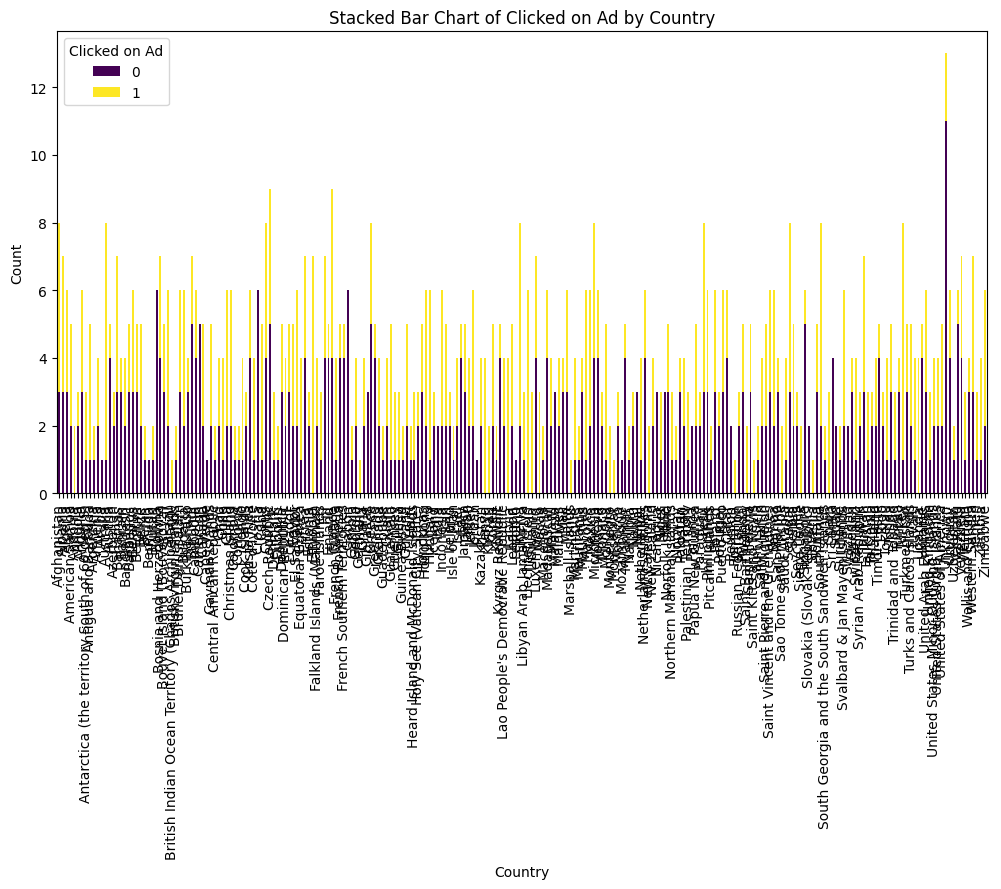

In [17]:
# Stacked Bar Chart of Clicked on Ad by County
# This chart shows the count of ad clicks by city.

city_counts = df.groupby(['Country', 'Clicked on Ad']).size().unstack(fill_value=0)
city_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Clicked on Ad by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

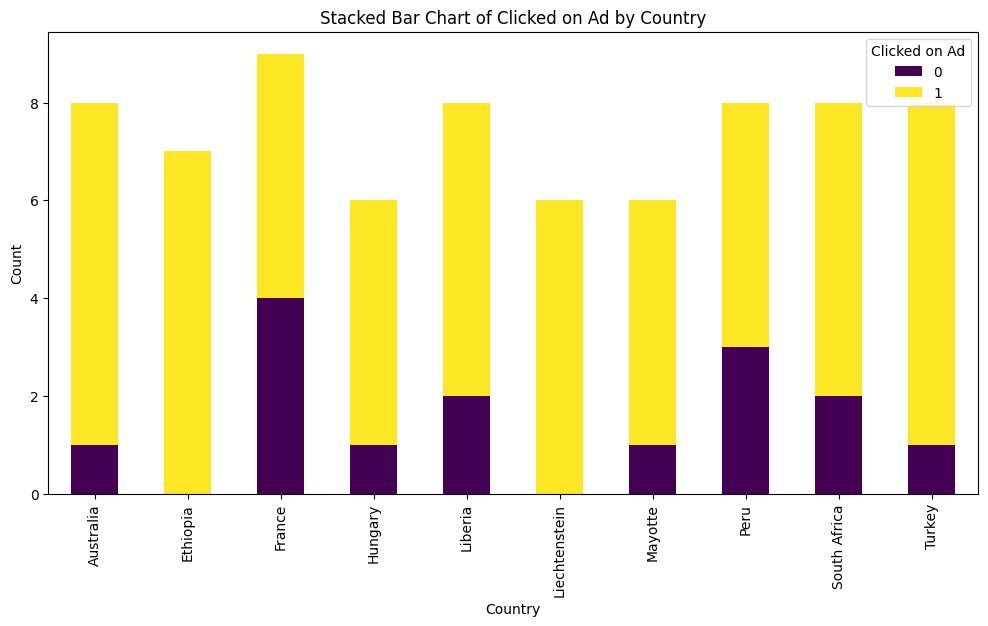

In [18]:
##Top 10 countries with the highest AD Click on Rate

topCountry = df[df['Clicked on Ad'] == 1]['Country'].value_counts().head(10).index.tolist()
topCountrydf = df[df['Country'].isin(topCountry)]

city_counts = topCountrydf.groupby(['Country', 'Clicked on Ad']).size().unstack(fill_value=0)
city_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Stacked Bar Chart of Clicked on Ad by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

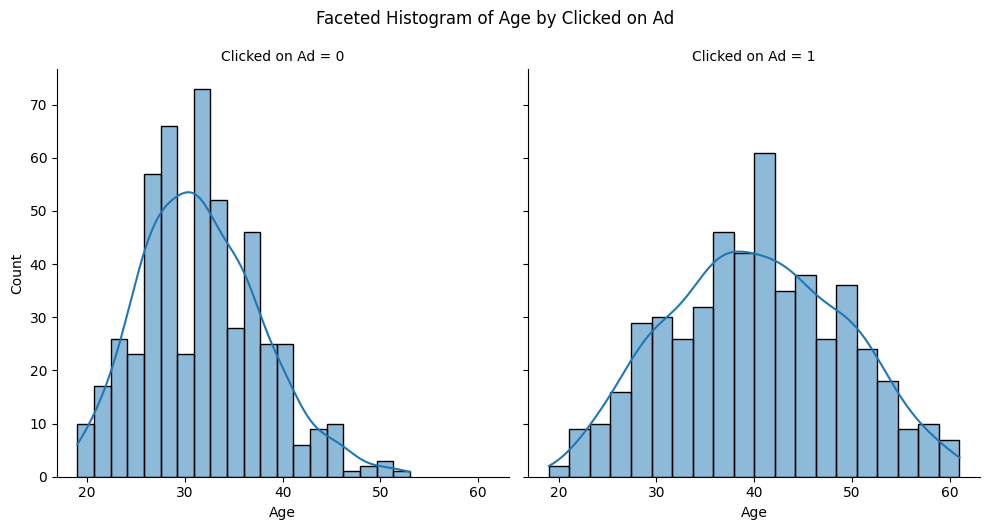

In [19]:
# Faceted Histogram of Age by Clicked on Ad
# It allowto compare distributions across different subsets of data.


g = sns.FacetGrid(df, col="Clicked on Ad", height=5, aspect=1)
g.map(sns.histplot, "Age", bins=20, kde=True)
g.set_axis_labels("Age", "Count")
g.set_titles("Clicked on Ad = {col_name}")
g.fig.suptitle('Faceted Histogram of Age by Clicked on Ad', y=1.05)
plt.show()

The facet plot reveals that the age distribution for individuals who did not click on the ad is right-skewed, indicating fewer people in the 40+ age group. In contrast, the age distribution for those who clicked on the ad is approximately normally distributed.

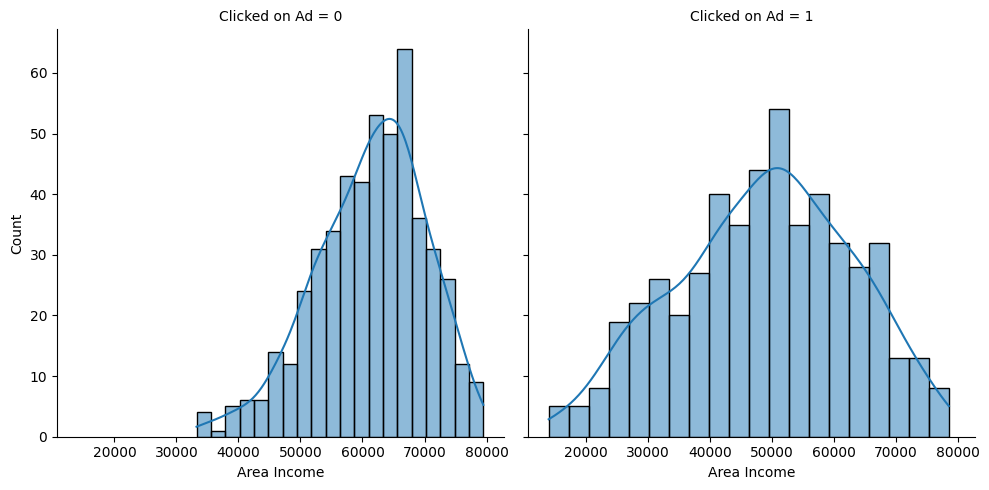

In [20]:
# Faceted Histogram of Area Income by Clicked on Ad
a = sns.FacetGrid(df,col = 'Clicked on Ad', height=5, aspect = 1)
a.map(sns.histplot, "Area Income", bins = 20, kde = True)
a.set_axis_labels("Area Income", "Count")
g.set_titles("Clicked on Ad = {col_name}")
g.fig.suptitle('Faceted Histogram of Age by Clicked on Ad', y=1.05)
plt.show()


The distribution of Area Income for people who did not click on the ad is left-skewed, with the majority of individuals falling into the higher income range around 60k-80k.The distribution of Area Income for people who clicked on the ad is approximately normally distributed, with the peak centered around 40k-60k.

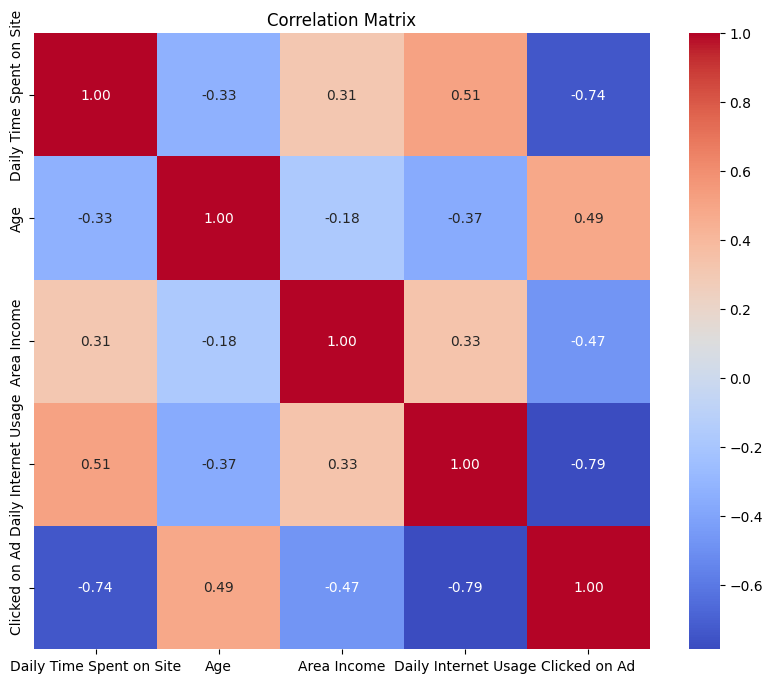

In [21]:
# Correlation Matrix

# numerical columns from the dataset
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(10, 8))
correlation_matrix = df[num_cols].corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

There is a strong negative correlation -0.79, suggesting that individuals who spend more time on the internet are less likely to click on ads.
Similarly, there is a strong negative correlation -0.74, indicating that users who spend more time on the site are also less likely to click on ads.

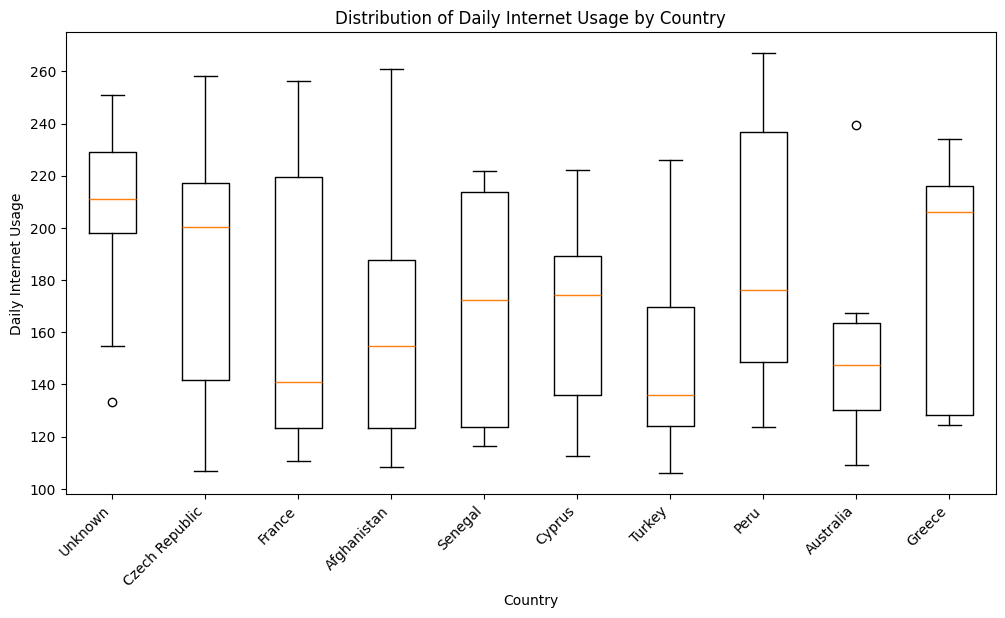

In [22]:
# Distribution of Daily Internet Usage by Country
# the top 10 countries by occurances
top_countries = df['Country'].value_counts().nlargest(10).index

plt.figure(figsize=(12, 6))
plt.boxplot([df[df['Country'] == country]['Daily Internet Usage'] for country in top_countries], labels=top_countries)
plt.xlabel('Country')
plt.ylabel('Daily Internet Usage')
plt.title('Distribution of Daily Internet Usage by Country')
ticks = plt.xticks(rotation=45, ha='right')


Countries such as France and Peru show a broad range of daily internet usage, with medians around 140 and 160 minutes, respectively. The usage spans from approximately 110 to 260 minutes for both countries, highlighting significant variation. This indicates diverse internet usage habits in these regions.

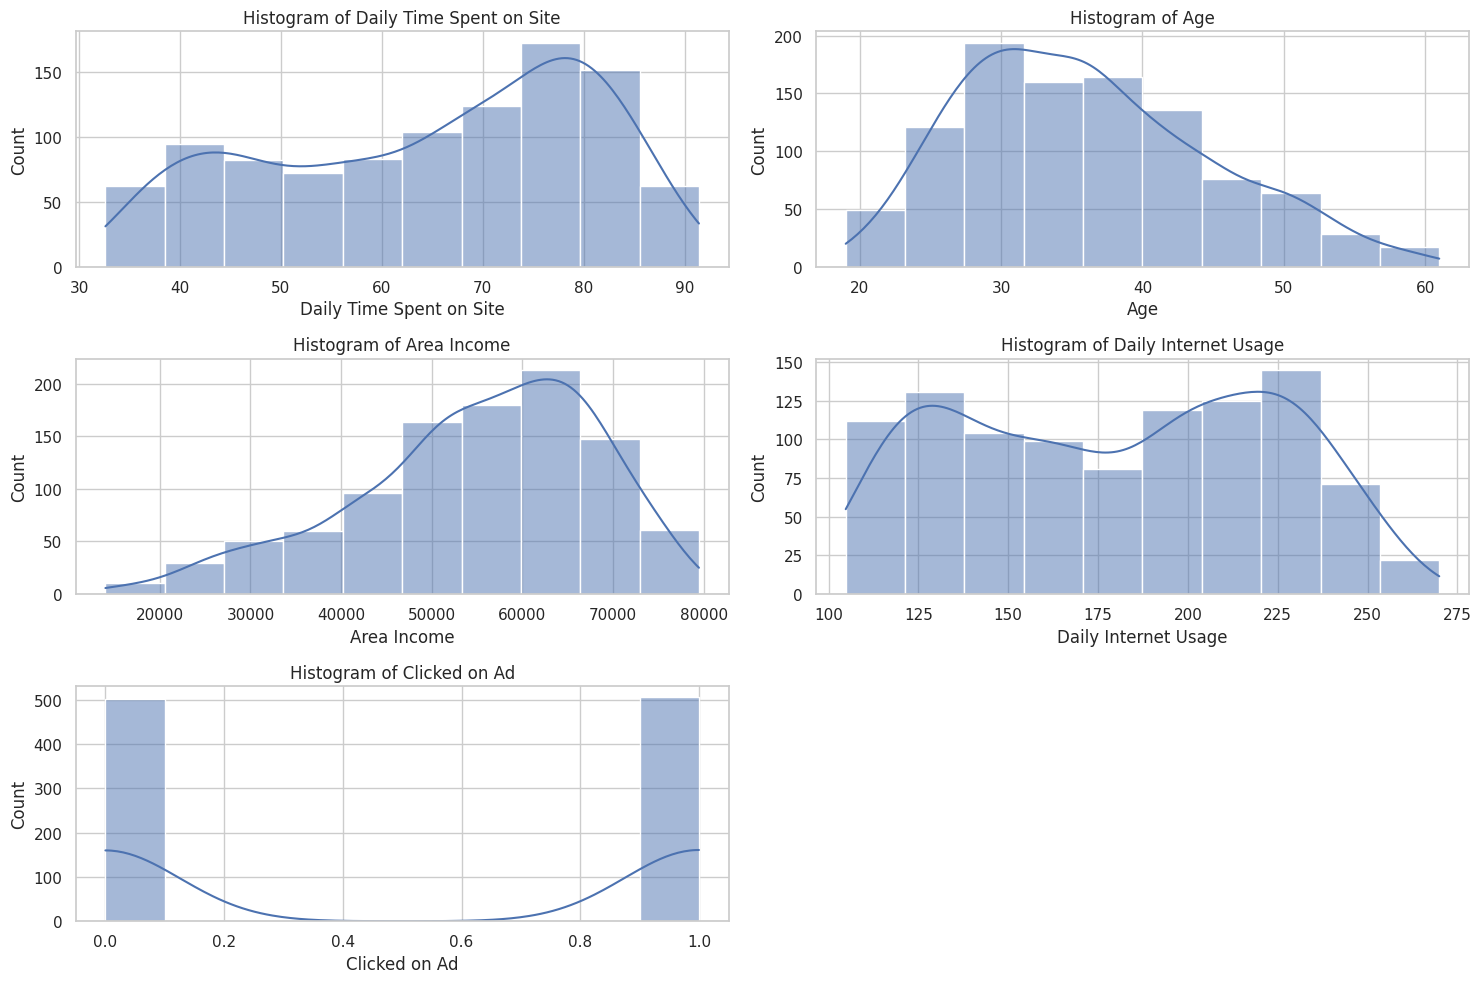

In [23]:
# Historgram for numerical features

sns.set(style="whitegrid")

num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols):
    plt.subplot(3, 2, i + 1)
    sns.histplot(df[col].dropna(), bins=10, kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

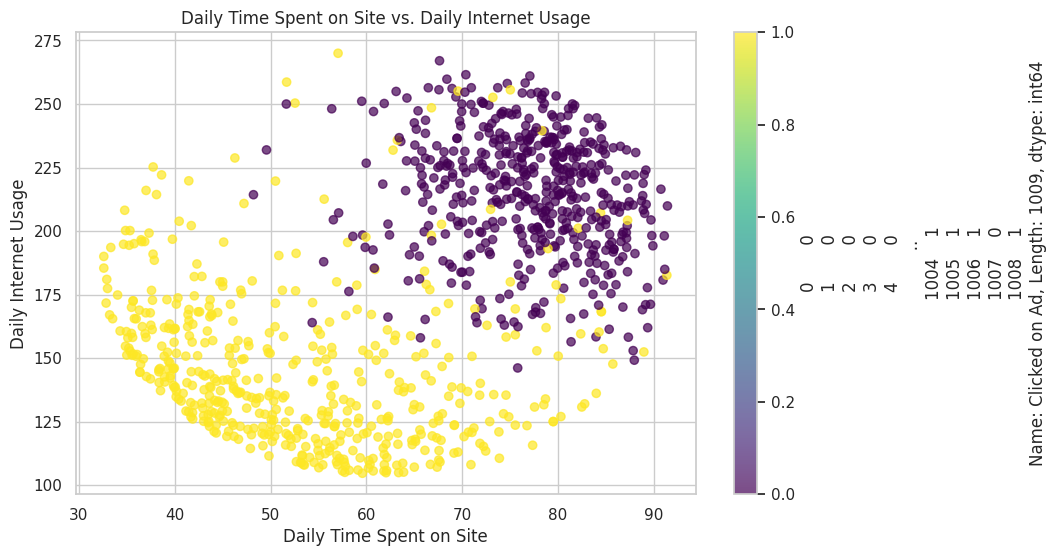

In [24]:
# Daily Time Spent on Site vs. Daily Internet Usage

plt.figure(figsize=(10, 6))
plt.scatter(x = df['Daily Time Spent on Site'], y =df['Daily Internet Usage'], c =df['Clicked on Ad'], cmap='viridis', alpha=0.7)   # TODO: fill the approproate features for x, y, c
plt.xlabel('Daily Time Spent on Site')
plt.ylabel('Daily Internet Usage')
plt.title('Daily Time Spent on Site vs. Daily Internet Usage')
colorbar= plt.colorbar(label= df['Clicked on Ad'])
plt.show()


There is a positive linear relationship between daily time spent on the site and daily internet usage, indicating that higher time spent on the site corresponds to increased internet usage.
Individuals with higher internet usage are less likely to click on the ad.
The marketing agency could prioritize targeting ads toward individuals who spend less time on the site, as they are more likely to engage with the advertisements.

**Predictive Modeling**

In [26]:
# importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [32]:
# creating a copy of the dataset
df2 = df.copy()

In [33]:
# Encoding categorical variables

df2 = pd.get_dummies(df2, columns=['City', 'Country'], drop_first= True)

In [34]:
# Selecting features for modeling
features = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Hour', 'Day', 'month'] + [col for col in df.columns if col.startswith(('City_', 'Country_'))]

X = df2[features]
y = df2['Clicked on Ad']

In [35]:
# Spliting the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
#  Scaling the features

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [38]:
#Logistic Regression Model

# Training logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train,y_train)

# Making predictions
y_pred = lr_model.predict(X_test)

In [39]:
# Evaluating the model
# evaluating accuracy score
print("Accuracy:")
print(accuracy_score(y_test,y_pred))

Accuracy:
0.9158415841584159


The accuracy of the model is around 92%

In [40]:
# confusion matrix

print("Confusion Matrix:")
print(confusion_matrix(y_test,y_pred))

Confusion Matrix:
[[90  6]
 [11 95]]


The model correctly predicted 95 positive cases.The model correctly predicted 90 negative cases.The model incorrectly predicted 6 cases as positive when they were actually negative.The model incorrectly predicted 11 cases as negative when they were actually positive



In [41]:
#  classification report

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91        96
           1       0.94      0.90      0.92       106

    accuracy                           0.92       202
   macro avg       0.92      0.92      0.92       202
weighted avg       0.92      0.92      0.92       202



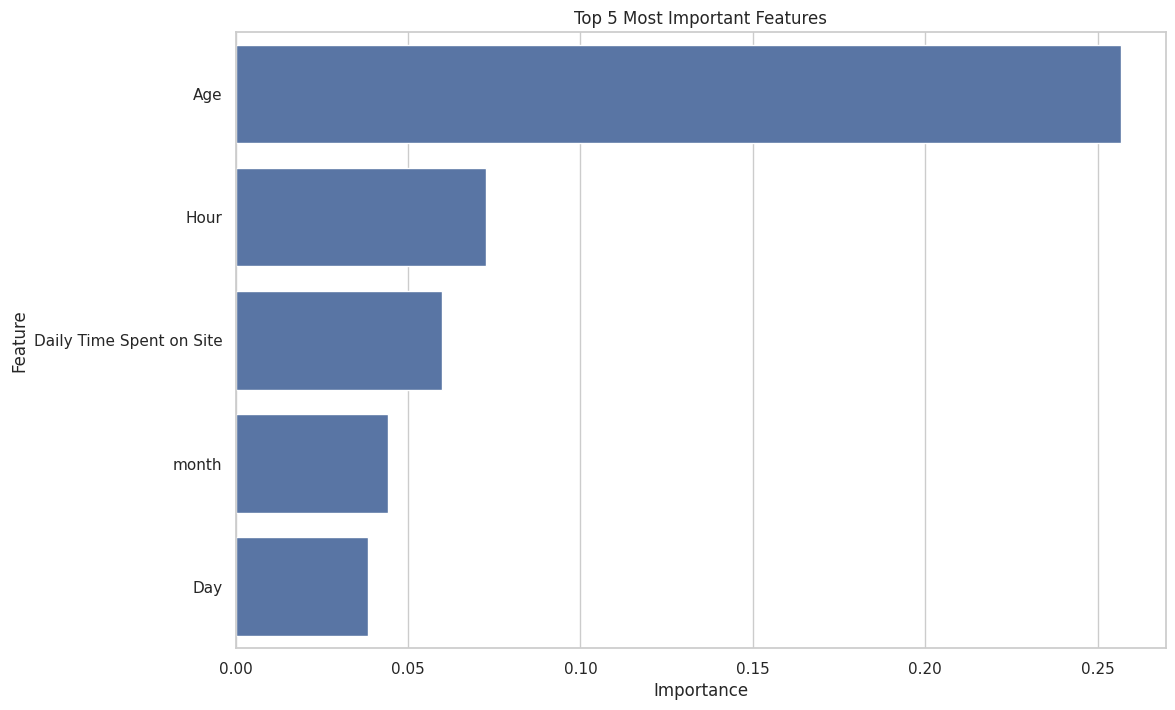

In [42]:
# Feature importance
feature_importance = pd.DataFrame({'Feature': features, 'Importance': abs(lr_model.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance.head(5))
plt.title('Top 5 Most Important Features')
plt.show()

Age is the most significant feature in predicting if the person Clicked on Ad.Followed by Hour and Daily Time Spent on Site.
